# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
micenum = merged_df["Mouse ID"].nunique()
micenum

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
micedup = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
#print(micedup)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
micedup_id = merged_df[merged_df["Mouse ID"]== "g989"]
micedup_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"]!= "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
micenum = clean_df["Mouse ID"].nunique()
micenum

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by Drug Regimen and saving it into summary_df
summary_df = clean_df.groupby("Drug Regimen")

# Calculate the statistical methods
summary_mean = summary_df["Tumor Volume (mm3)"].mean()
summary_median = summary_df["Tumor Volume (mm3)"].median()
summary_var = summary_df["Tumor Volume (mm3)"].var()
summary_std = summary_df["Tumor Volume (mm3)"].std()
summary_sem = summary_df["Tumor Volume (mm3)"].sem()

# Create and assemble results into a new DF
summary_stats = pd.DataFrame({
    "Mean Tumor Volume": summary_mean,
    "Median Tumor Volume": summary_median,
    "Tumor Volume Variance": summary_var,
    "Tumor Volume Std. Dev.": summary_std,
    "Tumor Volume Std. Err.": summary_sem 
})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_df = clean_df[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").agg(["mean", "median", "var", "std","sem"])
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

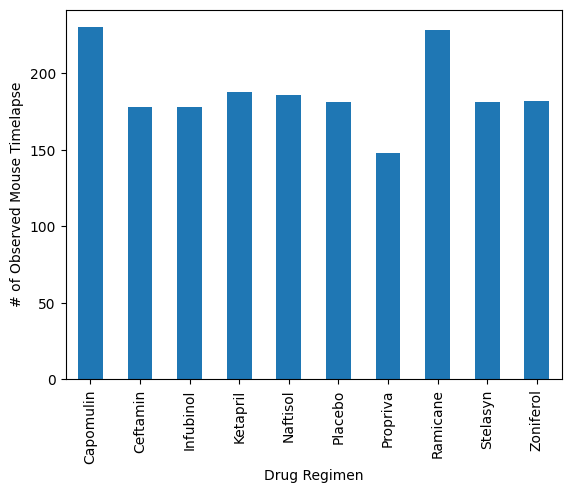

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the DataFrame by the "Drug Regimen" column
regimen_counts = clean_df.groupby("Drug Regimen").size()

# Generate a bar plot with the results
regimen_counts.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timelapse")

# Show the plot
plt.show()

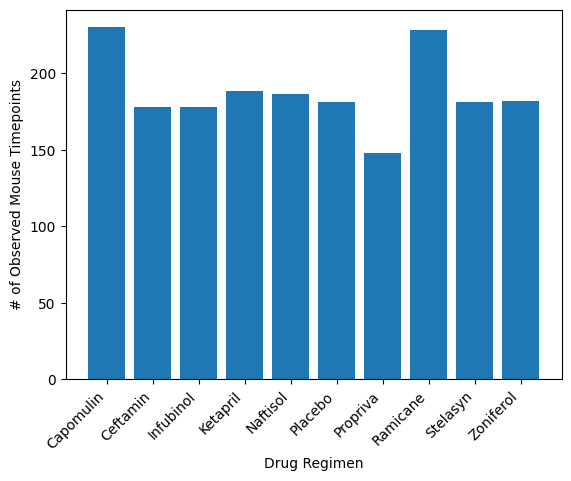

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimens = regimen_counts.index
rows = regimen_counts.values

plt.bar(drug_regimens, rows)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=45, ha='right')

plt.show()


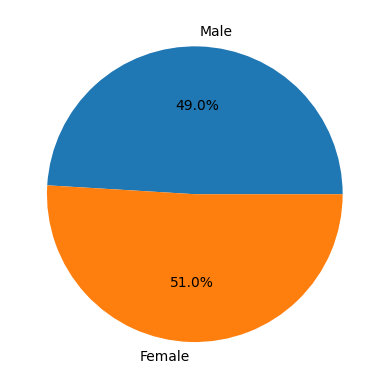

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_df.groupby("Sex").size()

# Plotting the pie chart
sex_df.plot(kind="pie", labels=["Male", "Female"], autopct="%1.1f%%", startangle=0)

# Display the plot
plt.show()


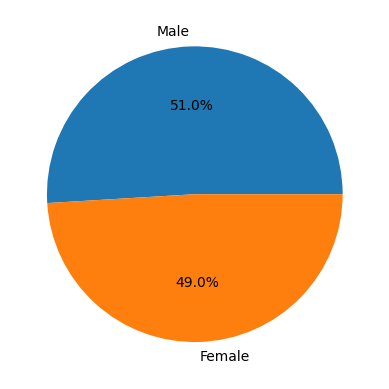

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_counts = clean_df['Sex'].value_counts()

# Data for the pie chart
labels = sex_counts.index
sizes = sex_counts.values

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Assign the values to df based on the Treatment Regimens (the : after the comma indicates that all columns should be selected)
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
# ramicane_df = clean_df.loc[clean_df["Drug Regimen"]== "Ramicane"]
# infubinol_df = clean_df.loc[clean_df["Drug Regimen"]== "Infubinol"]
# ceftamin_df = clean_df.loc[clean_df["Drug Regimen"]== "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_df.groupby("Mouse ID")
last_tp = last_tp["Timepoint"].max()
last_tp_df = pd.DataFrame(last_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol = pd.merge(last_tp_df, clean_df, on = ["Mouse ID", "Timepoint"])
tumor_vol.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Create empty dictionaries to store tumor volume data for each regimen
regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

tumorvol_dict = {regimen: [] for regimen in regimens}

# Iterate over tumor_vol DataFrame and fill the tumorvol_dict
for index, row in tumor_vol.iterrows():
    regimen = row["Drug Regimen"]
    tumor_volume = row["Tumor Volume (mm3)"]
    
    if regimen in tumorvol_dict:
        tumorvol_dict[regimen].append(tumor_volume)

# Calculate the IQR and determine potential outliers
outliers = []
for regimen, tumorvol_list in tumorvol_dict.items():
    quartiles = pd.Series(tumorvol_list).quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    # Print the IQR and quartiles
    print(f"\n{regimen}: ")
    print(f"The lower quartile of Tumor Volume is: {lower_quartile}")
    print(f"The upper quartile of Tumor Volume is: {upper_quartile}")
    print(f"The interquartile range of Tumor Volume is: {iqr}")
    print(f"Values below {lower_bound} could be potential outliers")
    print(f"Values above {upper_bound} could be potential outliers")

    # Find and store outliers
    for volume in tumorvol_list:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)

# Print the outliers
print(f"\nThe outliers are: {outliers}")


Capomulin: 
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
Values below 20.70456164999999 could be potential outliers
Values above 51.83201549 could be potential outliers

Ramicane: 
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
Values below 17.912664470000003 could be potential outliers
Values above 54.30681135 could be potential outliers

Infubinol: 
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
Values below 36.83290494999999 could be potential outliers
Values above 82.74144559000001 could be potential outliers

Ceftamin: 
The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquar

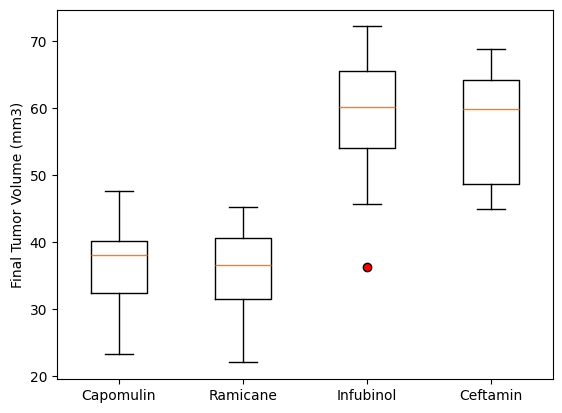

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Convert tumorvol_dict values to a list of arrays to access the data to plot
tumorvol_data = [tumorvol_list for tumorvol_list in tumorvol_dict.values()]

# Specify the style for outliers
red_circle = dict(markerfacecolor="r", marker="o")

# Create the boxplot
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumorvol_data, flierprops=red_circle)

# Set x-axis tick labels to treatment regimen names
ax1.set_xticklabels(tumorvol_dict.keys())

plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

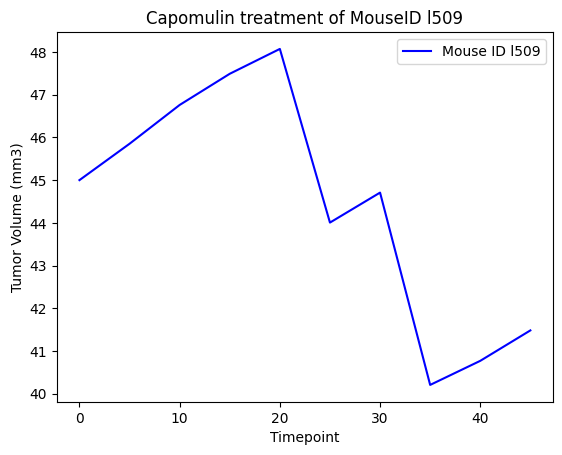

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse509 = capomulin_df.loc[capomulin_df["Mouse ID"]=="l509",:]


x = mouse509["Timepoint"]
y= mouse509["Tumor Volume (mm3)"]

plt.plot(x, y, color="blue", label = "Mouse ID l509")
plt.legend(loc="best")
plt.title(f"Capomulin treatment of MouseID l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [17]:
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [21]:
# Convert from object to value
capomulin_datadf = pd.to_numeric(capomulin_df["Tumor Volume (mm3)"], errors = "coerce")


# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()

# Calculate the average tumor volume for the Capomulin regimen
avg_capomulin = capomulin_datadf.groupby(["Mouse ID"]).mean()

marker_size = 12
plt.scatter(avg_capomulin["Weight (g)"], avg_capomulin["Tumor Volume (mm3)"], color ="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

KeyError: 'Tumor Volume (mm3)'

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


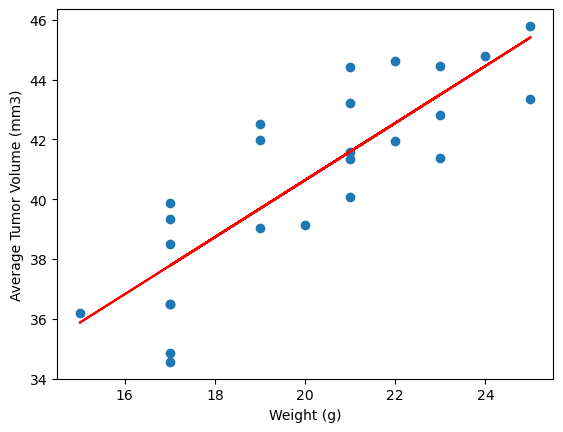

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
